In [178]:
import pandas as pd
import pydot
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [179]:
df_ratings = pd.read_csv("ml-latest-small/ratings.csv",sep=",")

In [180]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [181]:
len(df_ratings.userId.unique()), len(df_ratings.movieId.unique())

(610, 9724)

In [182]:
df_ratings.userId = df_ratings.userId.astype('category').cat.codes.values
df_ratings.movieId = df_ratings.movieId.astype('category').cat.codes.values

In [183]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,0,0,4.0,964982703
1,0,2,4.0,964981247
2,0,5,4.0,964982224
3,0,43,5.0,964983815
4,0,46,5.0,964982931


In [184]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_ratings, test_size=0.2)

In [185]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot

n_users, n_movies = len(df_ratings.userId.unique()), len(df_ratings.movieId.unique())
n_latent_factors = 3

In [186]:
movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))

prod = keras.layers.dot([movie_vec, user_vec], axes=1, name='DotProduct')
model = keras.Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error', metrics=['accuracy'])



In [187]:
#SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [188]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 3)         29175       Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 3)         1833        User[0][0]                       
__________________________________________________________________________________________________
FlattenMov

In [189]:
#factorizacion
history = model.fit([train.userId, train.movieId], train.rating,validation_data=([test.userId, test.movieId], test.rating), epochs=50, verbose=1)

Train on 80668 samples, validate on 20168 samples
Epoch 1/50
80668/80668 [==============================] - 11s 130us/step - loss: 12.3551 - acc: 0.0014 - val_loss: 9.6905 - val_acc: 0.0099
Epoch 2/50
80668/80668 [==============================] - 8s 104us/step - loss: 6.5300 - acc: 0.0530 - val_loss: 4.6098 - val_acc: 0.0955
Epoch 3/50
80668/80668 [==============================] - 8s 94us/step - loss: 3.4482 - acc: 0.1364 - val_loss: 3.0433 - val_acc: 0.1650
Epoch 4/50
80668/80668 [==============================] - 11s 133us/step - loss: 2.3158 - acc: 0.1951 - val_loss: 2.3167 - val_acc: 0.2094
Epoch 5/50
80668/80668 [==============================] - 9s 116us/step - loss: 1.7395 - acc: 0.2401 - val_loss: 1.9235 - val_acc: 0.2419
Epoch 6/50
80668/80668 [==============================] - 10s 120us/step - loss: 1.4081 - acc: 0.2669 - val_loss: 1.6950 - val_acc: 0.2638
Epoch 7/50
80668/80668 [==============================] - 8s 98us/step - loss: 1.2020 - acc: 0.2862 - val_loss: 1.5526 

Text(0,0.5,'Train Error')

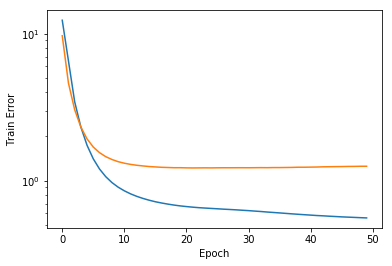

In [190]:
pd.Series(history.history['loss']).plot(logy=True)
pd.Series(history.history['val_loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

Text(0,0.5,'Train Error')

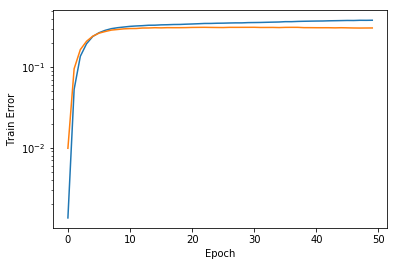

In [191]:
pd.Series(history.history['acc']).plot(logy=True)
pd.Series(history.history['val_acc']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [192]:
y_hat = np.round(model.predict([test.userId, test.movieId]),0)
y_true = test.rating
print(y_true)

54529     4.0
32569     4.5
75504     4.0
12008     3.5
18186     5.0
2515      2.0
22045     2.5
85884     4.0
42149     2.0
79773     2.5
1730      5.0
52933     5.0
51650     3.0
59805     3.0
7331      1.0
64219     4.5
19825     4.0
56563     4.0
60374     3.5
41544     4.5
43598     1.5
90286     5.0
5302      3.5
46728     3.5
59715     1.5
80425     3.0
54567     3.5
85220     5.0
84690     5.0
65460     4.5
         ... 
40010     3.0
95520     4.0
51619     2.5
47125     1.5
99133     4.0
14837     3.0
1411      4.0
66246     3.5
21752     3.5
82047     5.0
94380     2.0
100217    5.0
25400     5.0
42563     1.0
58332     3.0
49296     3.5
35050     3.0
40776     4.0
41128     4.0
60619     5.0
89338     5.0
95887     4.5
43264     4.0
73150     3.5
53912     4.0
78368     1.5
60804     5.0
94038     2.5
83082     4.5
60227     2.5
Name: rating, Length: 20168, dtype: float64


In [193]:
#googlear
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_hat)


0.7883528361761206

In [194]:
movie_embedding_learnt = model.get_layer(name='Movie-Embedding').get_weights()[0]
pd.DataFrame(movie_embedding_learnt).describe()

,0,1,2
count,9725.000000,9725.000000,9725.000000
mean,-0.571247,-0.561050,0.571998
std,0.263120,0.259713,0.262995
min,-1.436383,-1.504458,-0.896513
25%,-0.748590,-0.737940,0.444429
50%,-0.616668,-0.603640,0.609368
75%,-0.437136,-0.419944,0.743722
max,0.390332,0.393512,1.703112


In [195]:
user_embedding_learnt = model.get_layer(name='User-Embedding').get_weights()[0]
pd.DataFrame(user_embedding_learnt).describe()

,0,1,2
count,611.000000,611.000000,611.000000
mean,-1.847424,-1.853732,1.857717
std,0.466589,0.454536,0.546069
min,-3.728643,-3.464292,-1.281222
25%,-2.140224,-2.117831,1.592501
50%,-1.880313,-1.859993,1.893221
75%,-1.588912,-1.627387,2.184463
max,0.307325,1.089305,3.338473


In [196]:
from keras.constraints import non_neg
movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='NonNegMovie-Embedding', embeddings_constraint=non_neg())(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='NonNegUser-Embedding',embeddings_constraint=non_neg())(user_input))

prod = keras.layers.dot([movie_vec, user_vec], axes=1, name='DotProduct')
model = keras.Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

In [197]:
#otro modelo
history_nonneg = model.fit([train.userId, train.movieId], train.rating,validation_data=([test.userId, test.movieId], test.rating), epochs=10, verbose=1)


Train on 80668 samples, validate on 20168 samples
Epoch 1/10
80668/80668 [==============================] - 13s 161us/step - loss: 11.3506 - val_loss: 8.1870
Epoch 2/10
80668/80668 [==============================] - 9s 107us/step - loss: 5.5676 - val_loss: 4.1392
Epoch 3/10
80668/80668 [==============================] - 11s 132us/step - loss: 3.1104 - val_loss: 2.8087
Epoch 4/10
80668/80668 [==============================] - 6s 73us/step - loss: 2.1306 - val_loss: 2.1688
Epoch 5/10
80668/80668 [==============================] - 5s 62us/step - loss: 1.6213 - val_loss: 1.8215
Epoch 6/10
80668/80668 [==============================] - 5s 67us/step - loss: 1.3272 - val_loss: 1.6191
Epoch 7/10
80668/80668 [==============================] - 5s 67us/step - loss: 1.1426 - val_loss: 1.4895
Epoch 8/10
80668/80668 [==============================] - 6s 71us/step - loss: 1.0208 - val_loss: 1.4068
Epoch 9/10
80668/80668 [==============================] - 6s 77us/step - loss: 0.9364 - val_loss: 1.3493

In [198]:
movie_embedding_learnt = model.get_layer(name='NonNegMovie-Embedding').get_weights()[0]
pd.DataFrame(movie_embedding_learnt).describe()


,0,1,2
count,9725.000000,9725.000000,9725.000000
mean,0.430870,0.431119,0.430995
std,0.201181,0.201636,0.201595
min,-0.000000,-0.000000,-0.000000
25%,0.296462,0.296425,0.296495
50%,0.439517,0.439288,0.439460
75%,0.601672,0.603495,0.602872
max,0.883100,0.879899,0.862419


In [199]:
movie_embedding_learnt = model.get_layer(name='NonNegMovie-Embedding').get_weights()[0]
pd.DataFrame(movie_embedding_learnt).describe()

,0,1,2
count,9725.000000,9725.000000,9725.000000
mean,0.430870,0.431119,0.430995
std,0.201181,0.201636,0.201595
min,-0.000000,-0.000000,-0.000000
25%,0.296462,0.296425,0.296495
50%,0.439517,0.439288,0.439460
75%,0.601672,0.603495,0.602872
max,0.883100,0.879899,0.862419


In [200]:
n_latent_factors_user = 5
n_latent_factors_movie = 8

movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
movie_vec = keras.layers.Dropout(0.2)(movie_vec)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
user_vec = keras.layers.Dropout(0.2)(user_vec)

concat = keras.layers.concatenate([movie_vec, user_vec], name='Concat')
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)

result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
adam = Adam(lr=0.005)
model = keras.Model([user_input, movie_input], result)
model.compile(optimizer=adam,loss= 'mean_absolute_error', metrics=['accuracy'])


In [201]:
#SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))


In [202]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 8)         77800       Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         3055        User[0][0]                       
__________________________________________________________________________________________________
FlattenMov

In [203]:
#el que hay que usar concatenacion

history = model.fit([train.userId, train.movieId], train.rating,validation_data=([test.userId, test.movieId], test.rating), epochs=50, verbose=1)


Train on 80668 samples, validate on 20168 samples
Epoch 1/50
80668/80668 [==============================] - 16s 192us/step - loss: 0.7372 - acc: 0.2962 - val_loss: 0.7495 - val_acc: 0.2663
Epoch 2/50
80668/80668 [==============================] - 6s 79us/step - loss: 0.6752 - acc: 0.3243 - val_loss: 0.6850 - val_acc: 0.3258
Epoch 3/50
80668/80668 [==============================] - 12s 151us/step - loss: 0.6555 - acc: 0.3321 - val_loss: 0.6733 - val_acc: 0.3223
Epoch 4/50
80668/80668 [==============================] - 11s 139us/step - loss: 0.6435 - acc: 0.3384 - val_loss: 0.6723 - val_acc: 0.3290
Epoch 5/50
80668/80668 [==============================] - 9s 110us/step - loss: 0.6362 - acc: 0.3427 - val_loss: 0.6686 - val_acc: 0.3160
Epoch 6/50
80668/80668 [==============================] - 8s 100us/step - loss: 0.6311 - acc: 0.3443 - val_loss: 0.6631 - val_acc: 0.3256
Epoch 7/50
80668/80668 [==============================] - 11s 131us/step - loss: 0.6271 - acc: 0.3476 - val_loss: 0.6667

<Figure size 576x432 with 0 Axes>

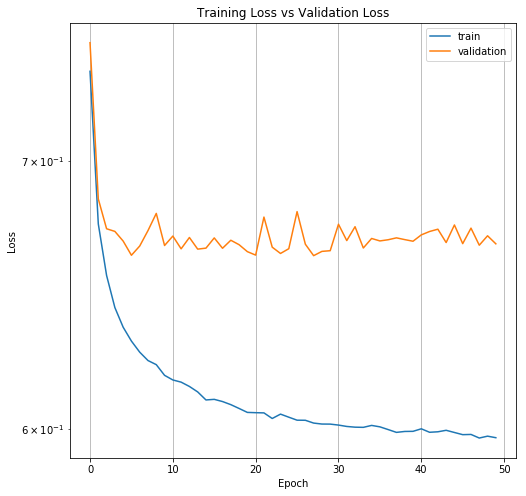

In [230]:
plt.clf()
plt.figure(figsize=(8,8))
pd.Series(history.history['loss']).plot(logy=True) #azul
pd.Series(history.history['val_loss']).plot(logy=True) #naranja
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])


Text(0,0.5,'Accuracy')

<Figure size 576x432 with 0 Axes>

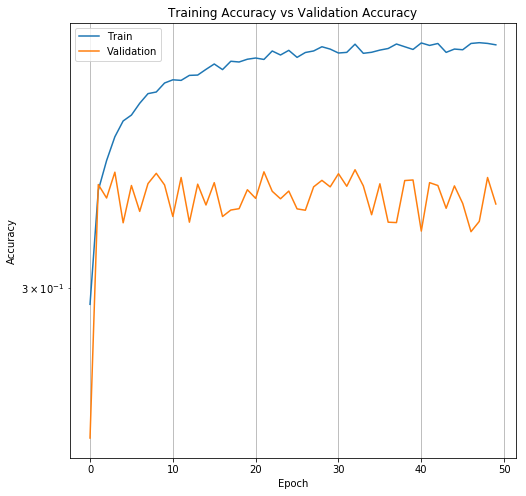

In [231]:
plt.clf()
plt.figure(figsize=(8,8))
pd.Series(history.history['acc']).plot(logy=True) #azul
pd.Series(history.history['val_acc']).plot(logy=True) #naranja
plt.grid()
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['Train', 'Validation'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


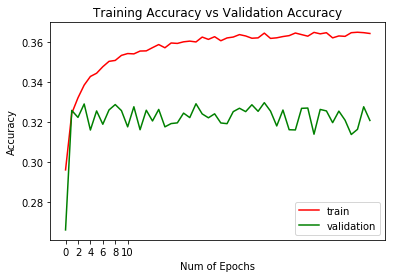

Text(0,0.5,'Train Error')

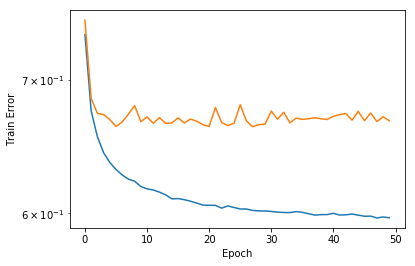

In [205]:
pd.Series(history.history['loss']).plot(logy=True)
pd.Series(history.history['val_loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [206]:
y_hat_2 = np.round(model.predict([test.userId, test.movieId]),0)
print(mean_absolute_error(y_true, y_hat_2))

print(mean_absolute_error(y_true, model.predict([test.userId, test.movieId])))

print(model.predict([test.userId, test.movieId]))


0.66960035700119
0.6675071814309884
[[3.281802 ]
 [4.425736 ]
 [3.6752844]
 ...
 [2.11016  ]
 [3.878872 ]
 [2.8185656]]


In [208]:
from keras.models import load_model
model.save('my_model2.h5')  # creates a HDF5 file 'my_model.h5'
